In [16]:
#What are the top 5 most common EV makes and models in the dataset?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

# Display basic info
print(f"Rows: {len(df)} | Columns: {len(df.columns)}")
df.head()


Rows: 247344 | Columns: 17


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4BZ0CP5G,King,Seattle,WA,98125.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,349455557,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98115.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,43.0,171417494,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1C4RJXN64R,Kitsap,Bremerton,WA,98312.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,26.0,262542927,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EB1J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35.0,110432815,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC,5.306701e+10


📍 County with the most EV registrations:
King — 122819 vehicles

📊 Top 10 Counties by EV Registrations:
County
King         122819
Snohomish     30587
Pierce        20534
Clark         15055
Thurston       9081
Kitsap         8375
Spokane        6971
Whatcom        6030
Benton         3320
Skagit         2843
Name: count, dtype: int64


C:\Users\thena\AppData\Local\Temp\ipykernel_16120\3006416313.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=county_distribution.head(10).values,


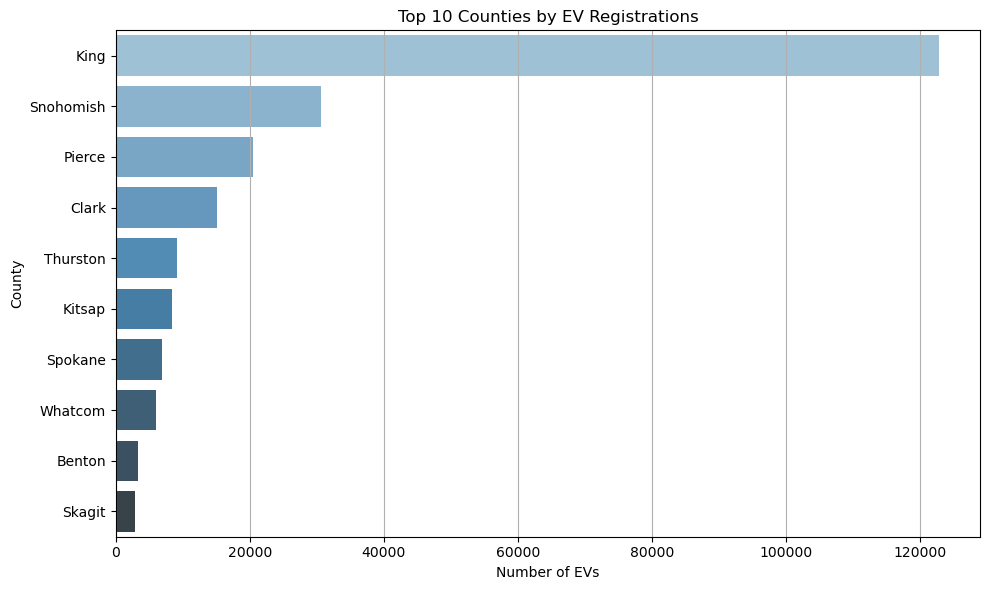

In [17]:
#What is the distribution of EVs by county? Which county has the most registrations?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Electric_Vehicle_Population_Data.csv"  # Update path if needed
df = pd.read_csv(file_path)

county_distribution = df['County'].value_counts()

top_county = county_distribution.idxmax()
top_county_count = county_distribution.max()

print(f"📍 County with the most EV registrations:")
print(f"{top_county} — {top_county_count} vehicles")

print("\n📊 Top 10 Counties by EV Registrations:")
print(county_distribution.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=county_distribution.head(10).values,
            y=county_distribution.head(10).index,
            palette="Blues_d")

plt.title("Top 10 Counties by EV Registrations")
plt.xlabel("Number of EVs")
plt.ylabel("County")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


📈 EV Adoption by Model Year:
Model Year
2000        8
2002        2
2003        1
2008       17
2010       23
2011      656
2012     1462
2013     4168
2014     3364
2015     4613
2016     5302
2017     8755
2018    14504
2019    11055
2020    12390
2021    20794
2022    29337
2023    59088
2024    49799
2025    20820
2026     1186
Name: count, dtype: int64


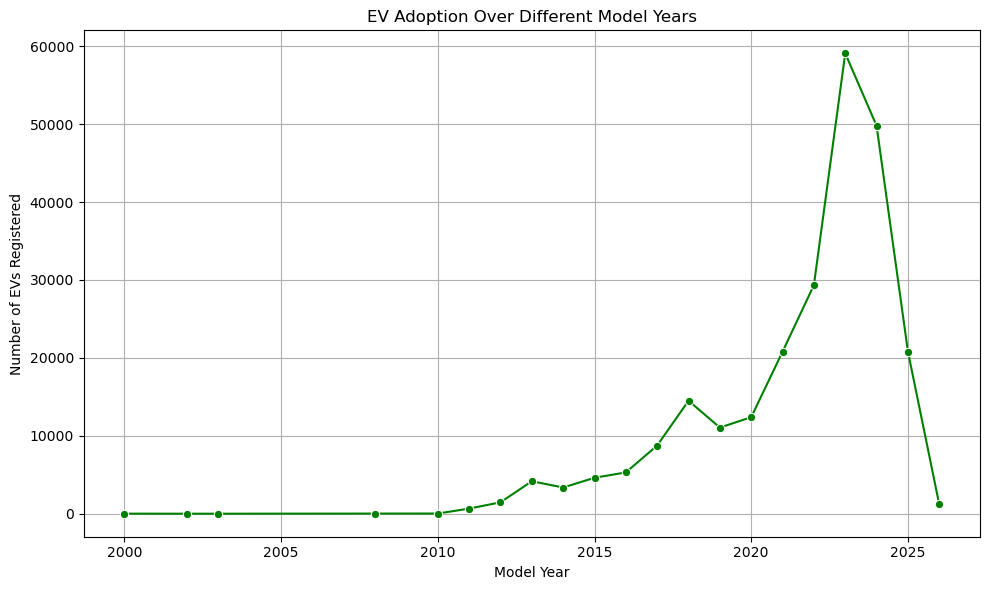

In [18]:
#How has EV adoption changed over different model years?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')

model_year_distribution = df['Model Year'].value_counts().sort_index()

print("📈 EV Adoption by Model Year:")
print(model_year_distribution)

plt.figure(figsize=(10, 6))
sns.lineplot(x=model_year_distribution.index,
             y=model_year_distribution.values,
             marker='o',
             color='green')

plt.title("EV Adoption Over Different Model Years")
plt.xlabel("Model Year")
plt.ylabel("Number of EVs Registered")
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
#What is the average electric range of EVs in the dataset?
import pandas as pd
import numpy as np

file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df['Electric Range'] = df['Electric Range'].replace(0, np.nan)

df = df.dropna(subset=['Electric Range'])

average_range = df['Electric Range'].mean()

print(f"🔋 Average Electric Range of EVs: {average_range:.2f} miles")


🔋 Average Electric Range of EVs: 113.03 miles


📊 CAFV Eligibility Breakdown:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
ELIGIBILITY UNKNOWN AS BATTERY RANGE HAS NOT BEEN RESEARCHED    149634
CLEAN ALTERNATIVE FUEL VEHICLE ELIGIBLE                          74523
NOT ELIGIBLE DUE TO LOW BATTERY RANGE                            23187
Name: count, dtype: int64

📈 Percentage Distribution:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
ELIGIBILITY UNKNOWN AS BATTERY RANGE HAS NOT BEEN RESEARCHED    60.50
CLEAN ALTERNATIVE FUEL VEHICLE ELIGIBLE                         30.13
NOT ELIGIBLE DUE TO LOW BATTERY RANGE                            9.37
Name: proportion, dtype: float64


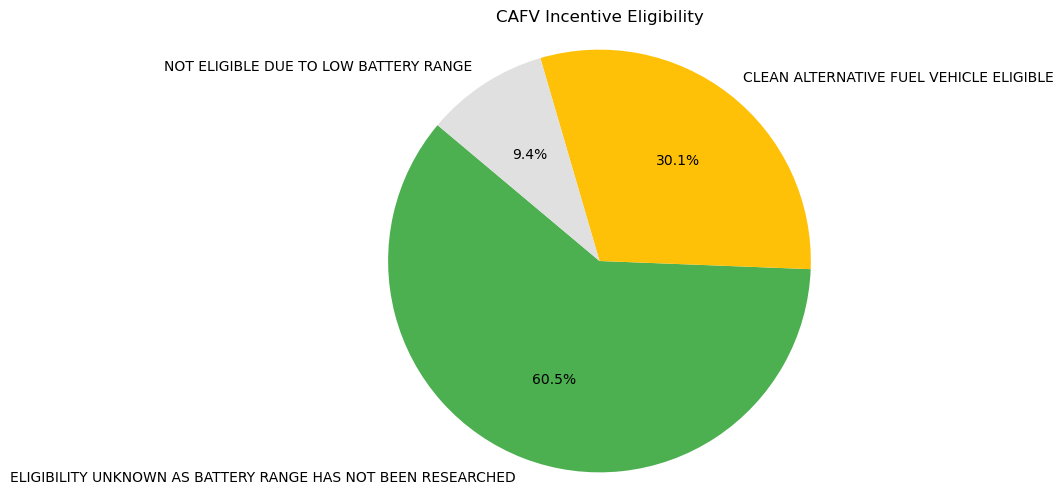

In [20]:
#What percentage of EVs are eligible for Clean Alternative Fuel Vehicle (CAFV) incentives?

import pandas as pd
import matplotlib.pyplot as plt

file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

caf_column = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'
df[caf_column] = df[caf_column].astype(str).str.strip().str.upper()

cafv_counts = df[caf_column].value_counts()
cafv_percent = df[caf_column].value_counts(normalize=True) * 100

print("📊 CAFV Eligibility Breakdown:")
print(cafv_counts)
print("\n📈 Percentage Distribution:")
print(cafv_percent.round(2))

plt.figure(figsize=(6, 6))
plt.pie(
    cafv_counts,
    labels=cafv_counts.index,
    autopct='%1.1f%%',
    colors=['#4CAF50', '#FFC107', '#E0E0E0'],
    startangle=140
)
plt.title("CAFV Incentive Eligibility")
plt.axis('equal')
plt.show()


🔋 Top 10 EV Models by Average Electric Range:
Make       Model   
PORSCHE    MACAN       304.091954
TESLA      MODEL Y          291.0
HYUNDAI    KONA             258.0
CHEVROLET  BOLT EV     244.562251
TESLA      MODEL X     241.322875
           MODEL 3      238.29214
           ROADSTER    235.909091
JAGUAR     I-PACE           234.0
POLESTAR   PS2              233.0
TESLA      MODEL S     227.986027
Name: Electric Range, dtype: object


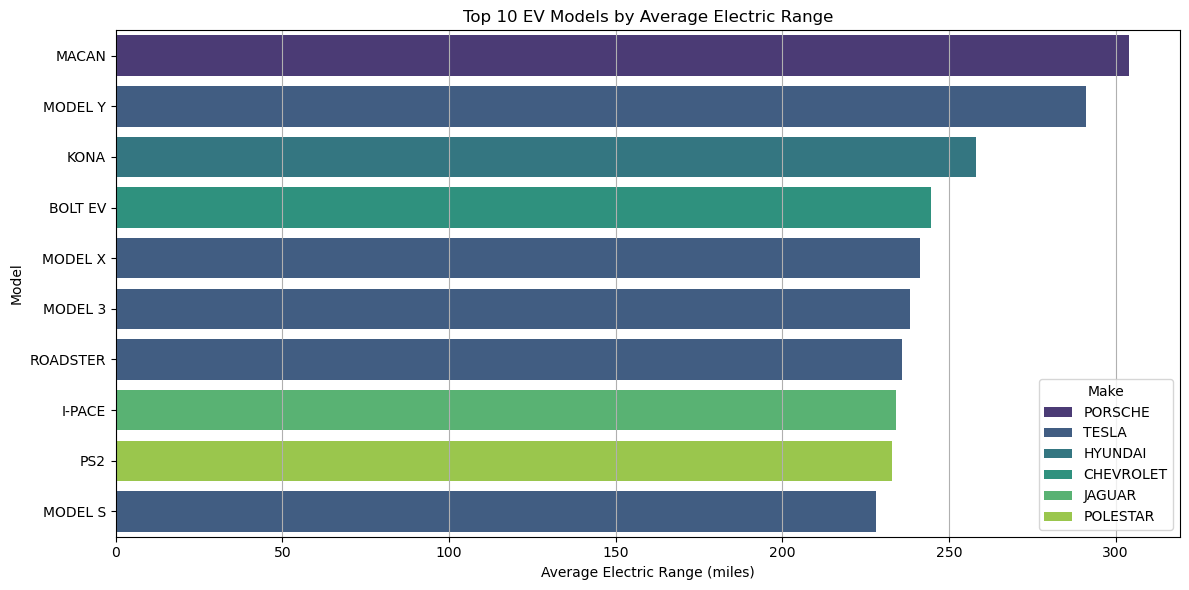

In [21]:
#How does the electric range vary across different makes and models?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df['Electric Range'] = df['Electric Range'].replace(0, pd.NA)

df = df.dropna(subset=['Electric Range'])

range_by_model = (
    df.groupby(['Make', 'Model'])['Electric Range']
      .mean()
      .dropna()
      .sort_values(ascending=False)
)

print("🔋 Top 10 EV Models by Average Electric Range:")
print(range_by_model.head(10))

top_10_range = range_by_model.head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_10_range, dodge=False, palette='viridis')
plt.title("Top 10 EV Models by Average Electric Range")
plt.xlabel("Average Electric Range (miles)")
plt.ylabel("Model")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


💰 Top 10 EV Models by Average Base MSRP:
Make      Model   
PORSCHE   918         845000.000000
          PANAMERA    184400.000000
TESLA     ROADSTER    106276.136364
FISKER    KARMA       102000.000000
BMW       740E         90244.642857
PORSCHE   CAYENNE      81100.000000
CADILLAC  CT6          75095.000000
TESLA     MODEL S      69042.244460
VOLVO     XC90         64950.000000
BMW       530E         54319.283276
Name: Base MSRP, dtype: float64


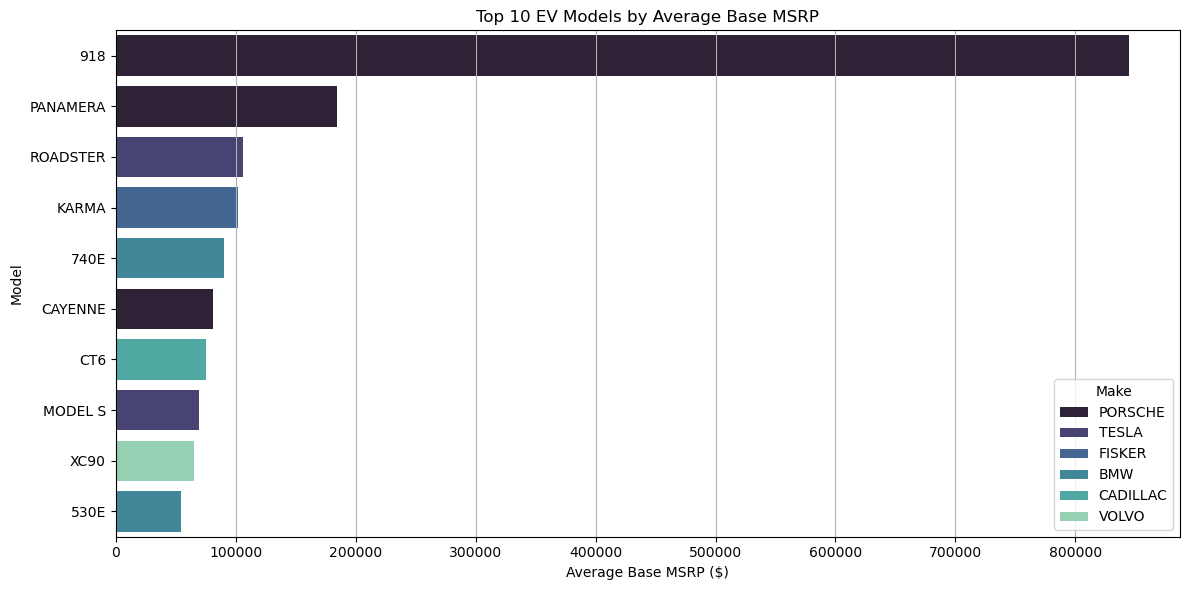

In [22]:
#What is the average Base MSRP for each EV model?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')
df['Base MSRP'] = df['Base MSRP'].replace(0, np.nan)

df = df.dropna(subset=['Base MSRP'])

avg_msrp = (
    df.groupby(['Make', 'Model'])['Base MSRP']
    .mean()
    .sort_values(ascending=False)
)

print("💰 Top 10 EV Models by Average Base MSRP:")
print(avg_msrp.head(10))

top10_msrp = avg_msrp.head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Base MSRP', y='Model', hue='Make', data=top10_msrp, dodge=False, palette='mako')
plt.title("Top 10 EV Models by Average Base MSRP")
plt.xlabel("Average Base MSRP ($)")
plt.ylabel("Model")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


📊 EV Distribution by Region Type (Urban vs Rural):
Region Type
Urban    221106
Rural     26238
Name: count, dtype: int64

📈 Percentage Distribution:
Region Type
Urban    89.39
Rural    10.61
Name: proportion, dtype: float64


C:\Users\thena\AppData\Local\Temp\ipykernel_16120\1468074026.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='coolwarm')


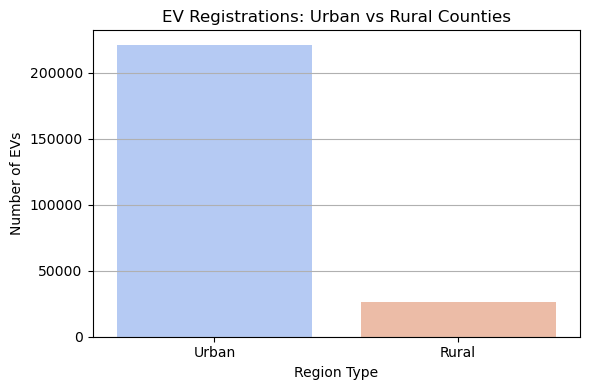

In [23]:
#Are there any regional trends in EV adoption (e.g., urban vs. rural areas)?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

df['County'] = df['County'].astype(str).str.strip().str.title()

urban_counties = [
    'King', 'Pierce', 'Snohomish', 'Clark', 'Spokane',
    'Thurston', 'Kitsap', 'Whatcom', 'Yakima'
]

def classify_region(county):
    if pd.isna(county):
        return 'Unknown'
    elif county in urban_counties:
        return 'Urban'
    else:
        return 'Rural'

df['Region Type'] = df['County'].apply(classify_region)

region_counts = df['Region Type'].value_counts()
region_percent = df['Region Type'].value_counts(normalize=True) * 100

print("📊 EV Distribution by Region Type (Urban vs Rural):")
print(region_counts)
print("\n📈 Percentage Distribution:")
print(region_percent.round(2))

plt.figure(figsize=(6, 4))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='coolwarm')
plt.title("EV Registrations: Urban vs Rural Counties")
plt.ylabel("Number of EVs")
plt.xlabel("Region Type")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
